In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data=make_blobs(n_features=2,n_samples=300,centers=2,cluster_std=1.0)

In [5]:
X,y=data

In [7]:
X


array([[ -6.56691923,   7.7797577 ],
       [ -5.19404422,   6.75458453],
       [  1.23265568,  -9.42980883],
       [ -2.49618917,   7.36892139],
       [ -6.10480663,   7.7775224 ],
       [ -5.59315881,  10.93577085],
       [  3.20441729,  -9.39821908],
       [ -5.49292974,   8.29044419],
       [ -6.62042067,   8.80242087],
       [ -4.5823466 ,   8.28969405],
       [ -5.40038686,   8.61295054],
       [ -5.25681332,   7.42512798],
       [ -7.42748705,   8.43250121],
       [ -4.38099409,   7.81158399],
       [ -6.28632091,   7.49514674],
       [  3.30741164, -10.65146553],
       [  3.21105289,  -9.40424464],
       [ -6.10026798,   7.38021819],
       [ -6.84261835,   7.28493843],
       [ -5.56896942,   7.23429557],
       [  3.2419847 ,  -8.04504514],
       [  1.61359939,  -9.84001033],
       [  2.82479392, -10.79331843],
       [  3.07910738,  -8.41265506],
       [ -4.70272891,   9.21618352],
       [  4.58551227,  -9.62742281],
       [  4.64130509,  -9.42984244],
 

In [8]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [9]:
np.random.seed(seed=101)
z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)

In [10]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [12]:
feat=pd.DataFrame(X)

In [14]:
feat=pd.concat([feat,z_noise],axis=1)

In [16]:
feat.columns=['X1',"X2","X3"]

In [17]:
feat.head()

,X1,X2,X3
0,-6.566919,7.779758,2.706850
1,-5.194044,6.754585,0.628133
2,1.232656,-9.429809,0.907969
3,-2.496189,7.368921,0.503826
4,-6.104807,7.777522,0.651118


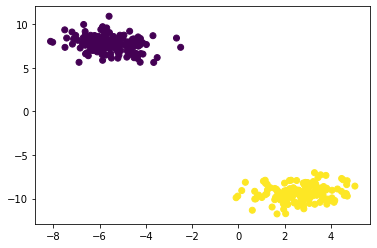

In [19]:
plt.scatter(feat["X1"],feat["X2"],c=y)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

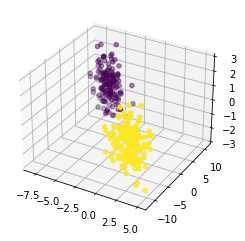

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(feat["X1"],feat["X2"],feat["X3"],c=y)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD

In [35]:
encoder=Sequential()
encoder.add(Dense(2,activation='relu',input_shape=[3]))

In [36]:
decoder=Sequential()
decoder.add(Dense(3,activation='relu',input_shape=[2]))

In [37]:
autoencoder=Sequential([encoder,decoder])

In [38]:
autoencoder.compile(loss="mse",optimizer=SGD(lr=1.5))

D:\Developpement\Coding\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(feat)

In [41]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 2s 7ms/step - loss: 0.2091
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1727
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1418
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1394


In [43]:
encoded_dim2=encoder.predict(scaled_data)

In [44]:
encoded_dim2

array([[0.        , 0.8657246 ],
       [0.        , 0.7535044 ],
       [0.        , 0.01652473],
       [0.        , 0.73203844],
       [0.        , 0.8090721 ],
       [0.        , 0.9029158 ],
       [0.        , 0.        ],
       [0.        , 0.8186082 ],
       [0.        , 0.793975  ],
       [0.        , 0.80733   ],
       [0.        , 0.8280766 ],
       [0.        , 0.7519398 ],
       [0.        , 0.84497076],
       [0.        , 0.7492841 ],
       [0.        , 0.7628222 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.82503986],
       [0.        , 0.8480705 ],
       [0.        , 0.7798023 ],
       [0.        , 0.02501856],
       [0.        , 0.01302796],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.8250205 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.01669054],
       [0.        , 0.6911039 ],
       [0.

In [45]:
encoded_dim2.shape

(300, 2)

### Remarque
On a a reduit le dataset de 3 dimensions a 2 dimensions

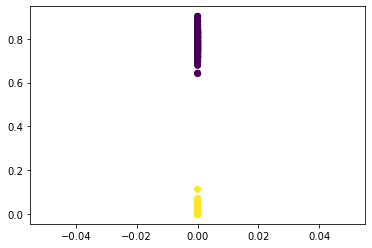

In [47]:
plt.scatter(encoded_dim2[:,0],encoded_dim2[:,1],c=y)